In [1]:
import pyteomics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from Chemometrics.basic import psave,pload
import opusFC #读取IR数据
import re
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline

吐温20 IR数据和质谱数据关联

# IR data

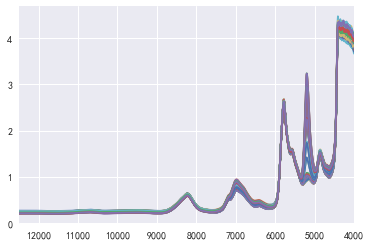

In [9]:

path = './Tween20-建模光谱/'
import os
flist = os.listdir('./Tween20-建模光谱/')
fs = [path+f for f in flist]
ys = []
for f in fs:
    dbs = opusFC.listContents(f)
    data = opusFC.getOpusData(f, dbs[0])
    ys.append(data.y)
    x = data.x
IRdata = pd.DataFrame(np.vstack(ys))
IRdata.columns = data.x
def substr_(text):
    m = re.search('^.+(?=\s{1})', text)
    if m:
        return m.group(0)
def substr(text):
    m = re.search('^.+(?=-[0-9]{1})', text)
    if m:
        return m.group(0)
b = [substr_(i) for i in flist]
a = [substr(i) for i in flist]
IRdata.index = a
IRdata_ = IRdata.copy()
IRdata_.index = b
psave(IRdata,'tw20_IR.p')
psave(IRdata_,'tw20_IR_.p')
IRdata = pload('tw20_IR.p')
IRdata.T.plot(legend=False)

In [4]:
def substr(text):
    m = re.search('^.+(?=\s{1})', text)
    if m:
        return m.group(0)
[substr(i) for i in flist]

['A1-1',
 'A1-2',
 'A1-3',
 'A10-1',
 'A10-2',
 'A10-3',
 'A11-1',
 'A11-2',
 'A11-3',
 'A12-1',
 'A12-2',
 'A12-3',
 'A13-1',
 'A13-2',
 'A13-3',
 'A14-1',
 'A14-2',
 'A14-3',
 'A2-1',
 'A2-2',
 'A2-2',
 'A2-3',
 'A3-1',
 'A3-2',
 'A3-3',
 'A4-1',
 'A4-2',
 'A4-3',
 'A5-1',
 'A5-2',
 'A5-3',
 'A6-1',
 'A6-2',
 'A6-3',
 'A7-1',
 'A7-2',
 'A7-3',
 'A8-1',
 'A8-2',
 'A8-3',
 'A9-1',
 'A9-2',
 'A9-3',
 'B1-1',
 'B1-2',
 'B1-3',
 'B2-1',
 'B2-2',
 'B2-3',
 'B3-1',
 'B3-2',
 'B3-3',
 'C1-1',
 'C1-2',
 'C1-3',
 'C2-1',
 'C2-2',
 'C2-3',
 'C3-1',
 'C3-2',
 'C3-3',
 'D1-1',
 'D1-2',
 'D1-3',
 'D2-1',
 'D2-2',
 'D2-3',
 'D3-1',
 'D3-2',
 'D3-3',
 'E1-1',
 'E1-2',
 'E1-3',
 'E2-1',
 'E2-2',
 'E2-3',
 'F1-1',
 'F1-2',
 'F1-3',
 'F2-1',
 'F2-2',
 'F2-3',
 'G1-1',
 'G1-2',
 'G1-3',
 'H1-1',
 'H1-2',
 'H1-3',
 'I1-1',
 'I1-2',
 'I1-3',
 'J1-1',
 'J1-2',
 'J1-3']

In [1]:
import opusFC #读取IR数据
f = './A1-1 TWEEN20.7.dx'
dbs = opusFC.listContents(f)
data = opusFC.getOpusData(f, dbs[0])

ValueError: Can't process a non-Opus file

In [7]:
import jcamp
f = './A1-1 TWEEN20.7.dx'
jcamp.jcamp_read(open(f))

{'data type': 'INFRARED SPECTRUM',
 'date': '19/1/2006',
 'deltax': -3.8571484,
 'end': '',
 'firstx': 12493.304,
 'firsty': 0.21930569,
 'jcamp-dx': 4.24,
 'lastx': 3999.8629,
 'maxy': 4.2447486,
 'miny': 0.21255322,
 'npoints': 2203,
 'origin': 'Administrator',
 'resolution': 8,
 'sampling procedure': 'Sample Compartment',
 'title': 'TWEEN20',
 'x': array([ 12493.        ,  12488.57142857,  12484.14285714, ...,
          4004.5       ,   4000.        ,   4000.        ]),
 'xfactor': 1,
 'xunits': '1/CM',
 'xydata': '(X++(Y..Y))',
 'y': array([ 0.21930569,  0.21924895,  0.21934965, ...,  3.91277219,
         3.9103253 ,  3.901505  ]),
 'yfactor': 3.9532302e-09,
 'yunits': 'ABSORBANCE'}

In [8]:
with open(f) as dx:
    data = jcamp.jcamp_read(dx)
    ir = pd.Series(data['y'],name=data['yunits'],index=data['x'])
    ir.index.name = data['xunits']

In [9]:
data

{'data type': 'INFRARED SPECTRUM',
 'date': '19/1/2006',
 'deltax': -3.8571484,
 'end': '',
 'firstx': 12493.304,
 'firsty': 0.21930569,
 'jcamp-dx': 4.24,
 'lastx': 3999.8629,
 'maxy': 4.2447486,
 'miny': 0.21255322,
 'npoints': 2203,
 'origin': 'Administrator',
 'resolution': 8,
 'sampling procedure': 'Sample Compartment',
 'title': 'TWEEN20',
 'x': array([ 12493.        ,  12488.57142857,  12484.14285714, ...,
          4004.5       ,   4000.        ,   4000.        ]),
 'xfactor': 1,
 'xunits': '1/CM',
 'xydata': '(X++(Y..Y))',
 'y': array([ 0.21930569,  0.21924895,  0.21934965, ...,  3.91277219,
         3.9103253 ,  3.901505  ]),
 'yfactor': 3.9532302e-09,
 'yunits': 'ABSORBANCE'}

In [10]:
import pandas as pd

In [18]:
ir = pd.Series(data['y'],name=data['yunits'],index=data['x'])
ir.index.name = data['xunits']

1/CM
12493.000000    0.219306
12488.571429    0.219249
12484.142857    0.219350
12479.714286    0.219460
12475.285714    0.219429
12470.857143    0.219298
12466.428571    0.219238
12462.000000    0.219326
12462.000000    0.219467
12457.714286    0.219571
12453.428571    0.219584
12449.142857    0.219525
12444.857143    0.219479
12440.571429    0.219466
12436.285714    0.219472
12432.000000    0.219464
12432.000000    0.219436
12427.571429    0.219464
12423.142857    0.219582
12418.714286    0.219696
12414.285714    0.219736
12409.857143    0.219710
12405.428571    0.219646
12401.000000    0.219599
12401.000000    0.219640
12396.571429    0.219716
12392.142857    0.219748
12387.714286    0.219765
12383.285714    0.219765
12378.857143    0.219709
                  ...   
4109.200000     4.146887
4104.600000     4.126079
4100.000000     4.098077
4100.000000     4.082621
4095.400000     4.060919
4090.800000     4.028550
4086.200000     4.010422
4081.600000     4.005361
4077.000000     4.00

~~~
avgIRdata = IRdata.groupby(by=IRdata.index).mean()
avgIRdata.T.plot(legend=False)
psave(avgIRdata,'tw20_IRavg.p')
~~~

In [2]:
avgIRdata = pload('tw20_IRavg.p')

# 质谱数据

~~~
tw20.drop('Unnamed: 25',axis=1,inplace=True)
psave(tw20,'tw20.p')
tw20.set_index('Compound ID',inplace = True)
tw20.columns
~~~

In [37]:
tw20 = pload('tw20.p')
raw_intensity = tw20.loc[:,'170627TW20_L1':'170627TW20_A2']
pct_intensity = tw20.loc[:,'170627TW20_L1.1':]
rt_mz_charge = tw20.loc[:,'Retention time (min)':'Charge']
rest = tw20.loc[:,:'Adducts']
rest.head()

,Compound name,Accepted Description,Retention time (min),m/z,Charge,Adducts
Compound ID,,,,,,
1,聚氧乙烯山梨醇酐（PS）,Tween20_PS_14,18.406033,798.470106,1,M+NH4
2,聚氧乙烯山梨醇酐（PS）,Tween20_PS_15,18.990433,842.495603,1,"M+NH4, M+2NH4"
3,聚氧乙烯山梨醇酐（PS）,Tween20_PS_16,19.546250,886.521321,1,"M+H, M+2H, M+NH4, M+2NH4"
4,聚氧乙烯山梨醇酐（PS）,Tween20_PS_17,20.152067,930.547731,1,"M+NH4, M+Na"
5,聚氧乙烯山梨醇酐（PS）,Tween20_PS_18,20.701467,974.573679,1,"M+NH4, M+Na"


In [4]:
def substr1(text,regexp):
    m = re.search(regexp, text)
    if m:
        return m.group(0)

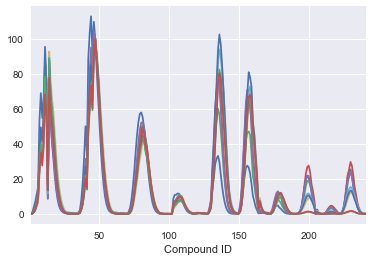

In [5]:
l = pct_intensity.columns.tolist()
regexp = '(?<=_).+(?=.1$)'
pct_intensity.columns = [substr1(i,regexp) for i in l]
pct_intensity = pct_intensity.T
pct_intensity.index.name = 'sample_num'
pct_intensity.T.plot(legend=False)

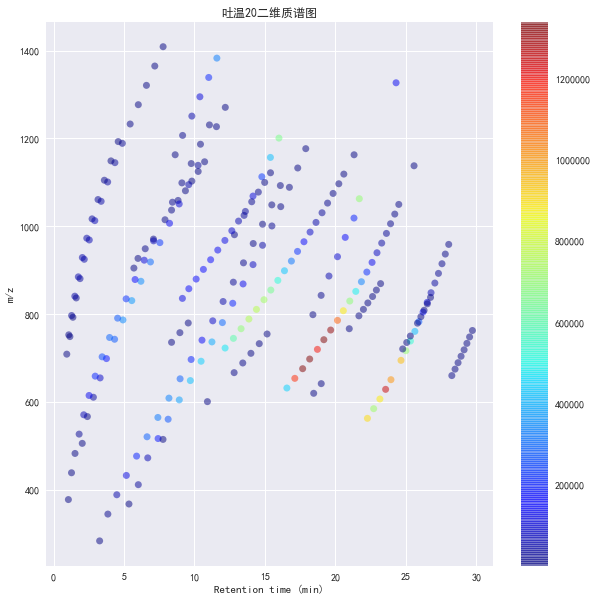

In [27]:
data = tw20
fig_name = 'mass-tw20.png'
vmax = np.percentile(data.loc[:,'170627TW20_L1'],99)
plt.rcParams['figure.figsize'] = (10,10)
plt.scatter(data.loc[:,'Retention time (min)'],data.loc[:,'m/z'],c=data.loc[:,'170627TW20_L1'],vmax=vmax,alpha=0.5, cmap="jet", edgecolors="none")
plt.colorbar()
plt.xlabel('Retention time (min)')
plt.ylabel('m/z')
plt.title(u'吐温20二维质谱图')
plt.savefig(fig_name,dpi = 300)

In [6]:
idx = pct_intensity.index.to_series().loc[pct_intensity.index.to_series().isin(avgIRdata.index.to_series())]
X = avgIRdata.loc[idx]
Y = pct_intensity.loc[idx]
psave({'IR':X,'mass':Y},'ir_mass.p')

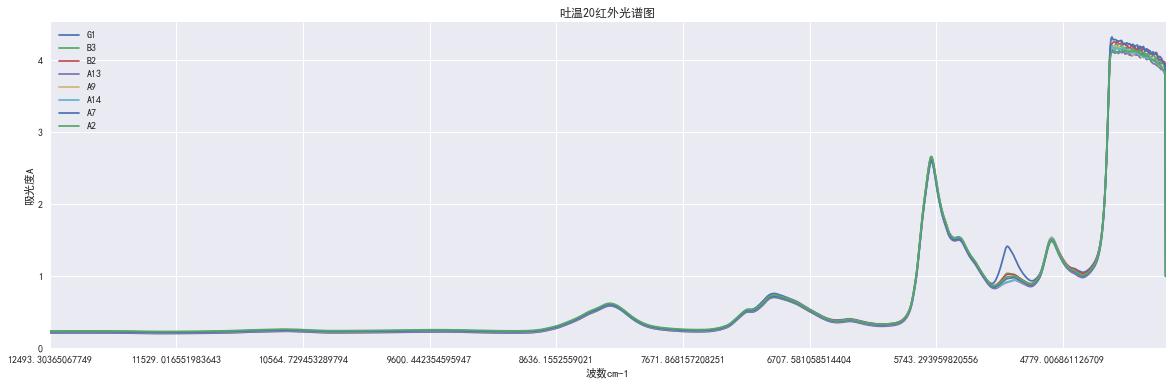

In [33]:
plt.rcParams['figure.figsize'] = (20,6)
X.T.plot()
fig_name = 'tw20_IR光谱.png'
plt.xlabel('波数cm-1')
plt.ylabel('吸光度A')
plt.title(u'吐温20红外光谱图')
plt.savefig(fig_name,dpi = 300)

# 建模

In [7]:
a = pload('ir_mass.p')
X = a['IR']
Y = a['mass']
X.loc[:,'constant'] = 1

# LR建模

~~~
X.to_excel('IR.xlsx')
Y.to_excel('tw20_mass.xlsx')
xy = pd.concat([X,Y],axis=1)
~~~

- LinearRegression

In [8]:
from sklearn.linear_model import LinearRegression #线性回归
from sklearn.model_selection import cross_val_score,train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=1)
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train),lr.score(X_test,y_test)

(1.0, -0.6029686520991383)

可以看出可以过拟合overfitting, 不能泛化generalization

# Ridge

LR+l2 regularization

In [10]:
from sklearn.linear_model import Ridge
rgr = Ridge(.03)
rgr.fit(X_train,y_train)
rgr.score(X_train,y_train),rgr.score(X_test,y_test)

(0.94499709381494756, -0.56628136172758792)

In [23]:
import scipy
from sklearn.model_selection import RandomizedSearchCV

In [24]:
parameters = {'alpha':scipy.stats.expon(scale=1)}
rnd = RandomizedSearchCV(rgr,parameters)
rnd.fit(X,Y)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Ridge(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000180A2D51BE0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

# PLSR

In [25]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
plsr = PLSRegression(n_components=7)
plsr.fit(X,Y)
plsr.score(X,Y)

-3969.936130353

In [26]:
#parameters = {'n_components':[1,2,3,4,5],'copy':[True]}
parameters = {'n_components':[1,2,3,4,5]}
rgr = GridSearchCV(plsr,parameters,cv=8)
rgr.fit(X,Y)

GridSearchCV(cv=8, error_score='raise',
       estimator=PLSRegression(copy=True, max_iter=500, n_components=7, scale=True, tol=1e-06),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_components': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

- 参数优化

1. GridSearchCV 交叉验证网格搜索